<a href="https://colab.research.google.com/github/m-tegar-ma/Porto_1/blob/main/gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gender Classification**

*   Author   : M. Tegar Mulia Akbar
*   Date     : 2021-09-03
*   Dataset  : Gender Classification Dataset (Kaggle)

For the early project, this dataset is a good choice to learn and develop your machine learning skill in supervised learning, especially for the classification.The machine learning model in this project is to predict wheter the features described a male or female. This model further can be used to predict the gender of male and female completely with face recognition model.

## Classification
In statistics, classification is the problem of identifying to which of a set of categories an observation, belongs to.

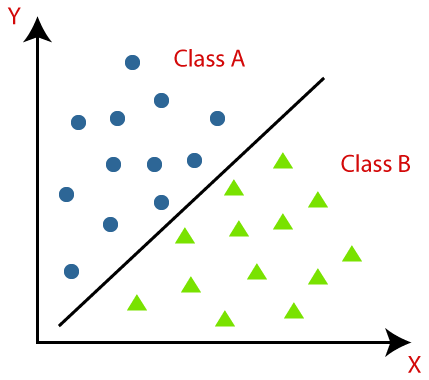

## Import the libraries

In [ ]:
# Import EDA library
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import graph library
import matplotlib.pyplot as plt

In [ ]:
# Import statistic library
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the dataset

In [ ]:
# Import 'kaggle.json' from Kaggle API to Colab Notebook
# Install Kaggle to Colab
! pip install kaggle

In [ ]:
# Make a directory named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset that you want to use. In this case will use 'gender-classification-dataset'
! kaggle datasets download elakiricoder/gender-classification-dataset

  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 15.6MB/s]


In [ ]:
# Unzip the file and your data is ready to use
! unzip gender-classification-dataset.zip -d gender-classification

Archive:  gender-classification-dataset.zip
  inflating: gender-classification/gender_classification_v7.csv  


In [ ]:
# Read .csv file and store it to your data. Get the preview of your data
gen_data = pd.read_csv('gender-classification/gender_classification_v7.csv')
gen_data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


## Clean Dataset


### Simple Data Checking

In [ ]:
# Check shape of gender dataset
print("The shape of gender dataset :", gen_data.shape)

The shape of gender dataset : (5001, 8)


In [ ]:
# Check columns name of gender dataset
print("The columns name of gen_data :", gen_data.columns)

The columns name of gen_data : Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


Features
* long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

* forehead_width_cm - This column is in CM's. This is the width of the forehead.

* forehead_height_cm - This is the height of the forehead and it's in Cm's.

* nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

* nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

* lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

* distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

Label
* gender - This is either "Male" or "Female".

In [ ]:
# Get the summary information of data
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


Text(0.5, 1.0, 'Gender')

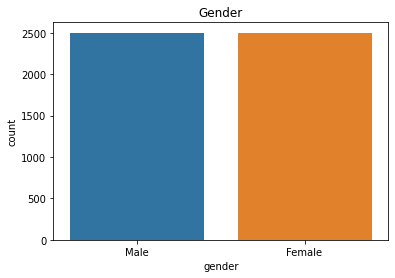

In [ ]:
# Create visualization of label data (gender)
sns.countplot(x='gender', data=gen_data).set_title("Gender")

In [ ]:
# Check the total number of gender 
print('Total number of Male are',(gen_data['gender'] == 'Male').sum())
print('Total number of Female are',(gen_data['gender'] == 'Female').sum())

Total number of Male are 2500
Total number of Female are 2501


*Gender distribution has the balance quantity*

### Check Missing Data

In [ ]:
#Total missing value of each columns
print("Total missing value of long_hair :", gen_data['long_hair'].isna().sum())
print("Total missing value of forehead_width_cm :", gen_data['forehead_width_cm'].isna().sum())
print("Total missing value of forehead_height_cm :", gen_data['forehead_height_cm'].isna().sum())
print("Total missing value of nose_wide :", gen_data['nose_wide'].isna().sum())
print("Total missing value of nose_long :", gen_data['nose_long'].isna().sum())
print("Total missing value of lips_thin :", gen_data['lips_thin'].isna().sum())
print("Total missing value of distance_nose_to_lip_long :", gen_data['distance_nose_to_lip_long'].isna().sum())

Total missing value of long_hair : 0
Total missing value of forehead_width_cm : 0
Total missing value of forehead_height_cm : 0
Total missing value of nose_wide : 0
Total missing value of nose_long : 0
Total missing value of lips_thin : 0
Total missing value of distance_nose_to_lip_long : 0


*There are no missing values so we don't need to drop the columns or replace it, further will check the multicollinearity for efectiveness purpose.*

### Check correlation between Data

In [ ]:
# Assign variable for column in numeric type
num_col = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

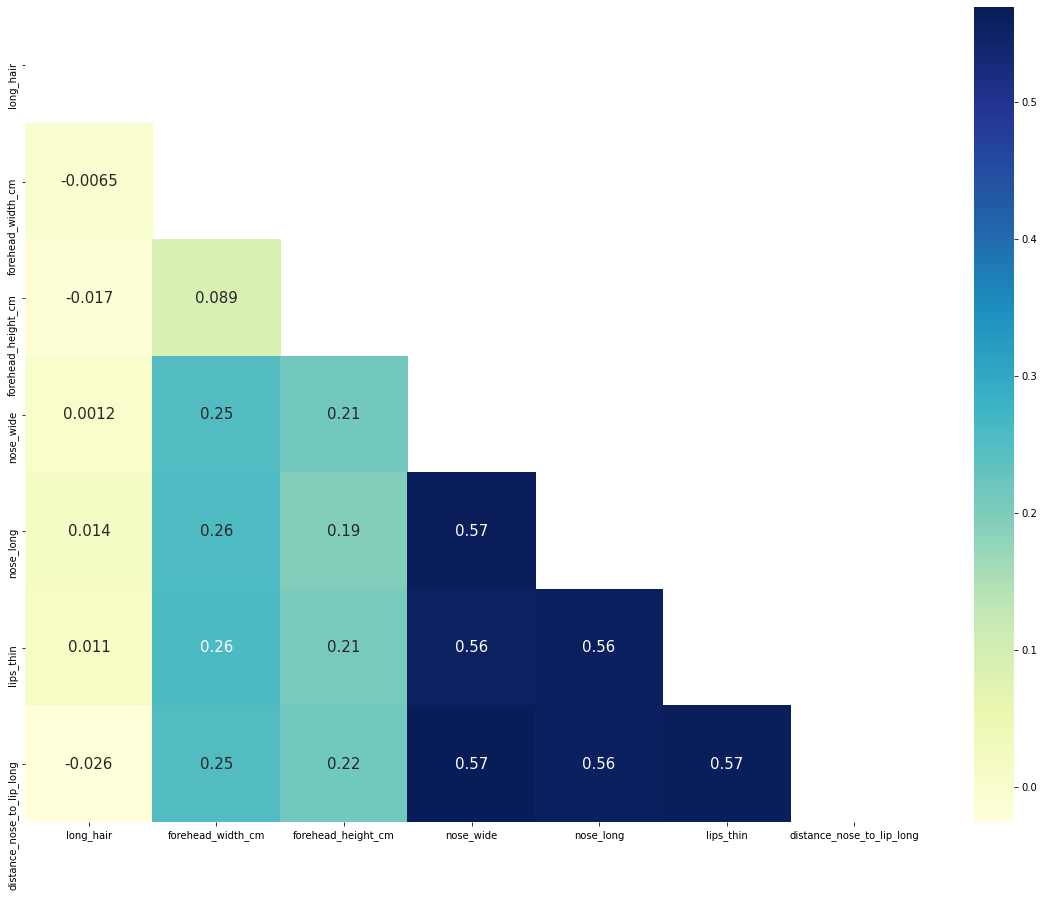

In [ ]:
# Check correlation between column

correlation_between_column = gen_data[num_col].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)

*'nose_wide', nose_long', 'lips_thin' and 'distance_nose_to_lip_long' have a high correlation, but we try not to drop some of them since the features are quite a few*

### Check The Outlier

In [ ]:
# Check simple statistic of the numeric columns
gen_data[num_col].describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


*It looks like 'long_hair' distributions are skewed to the right.*

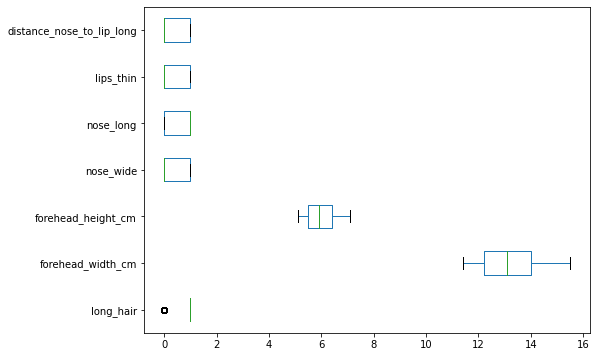

In [ ]:
# Check outlier using boxplot
gen_data.boxplot(column=num_col,fontsize=10,rot=0,grid=False,figsize=(8,6),vert=False)

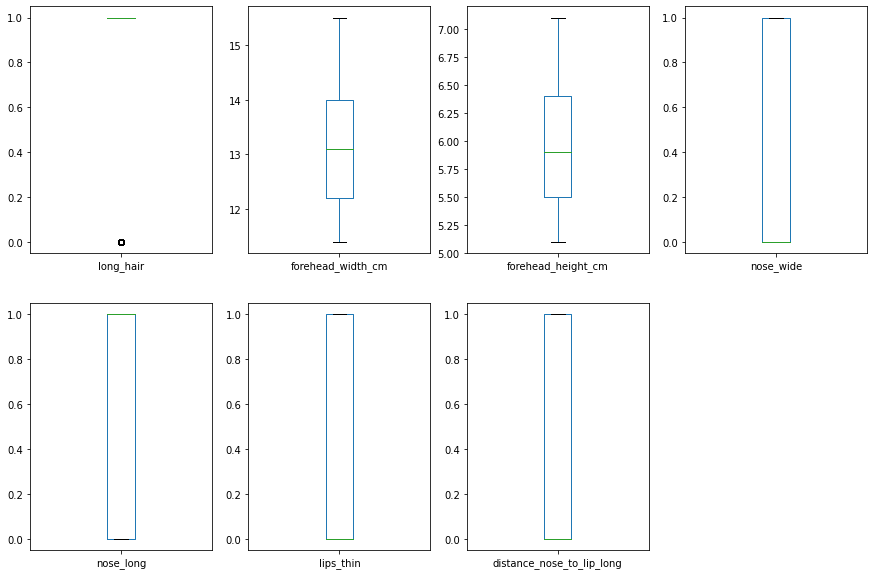

In [ ]:
# Check outlier using boxplot - 2
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(15,10))

for i,el in enumerate(num_col):
    a = gen_data.boxplot(el, ax=axes.flatten()[i],grid=False)

fig.delaxes(axes[1][3])
plt.show()

*There are no outlier from the boxplot above, but the 'long_hair' feature has skewed to the right.*

In [ ]:
# Check 'long_hair' feature
print(gen_data[(gen_data['long_hair'] == 1)].count())

long_hair                    4349
forehead_width_cm            4349
forehead_height_cm           4349
nose_wide                    4349
nose_long                    4349
lips_thin                    4349
distance_nose_to_lip_long    4349
gender                       4349
dtype: int64


*'long_hair' has total 4349 of 5001 rows or 86.96% from all of the rows in feature for value of 1 (male).*

In [ ]:
# Create final dataframe
final_feature_column = ['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
target_column = ['gender']
final_column = final_feature_column+target_column
final_df = gen_data[final_column].copy()

*Don't need to remove any rows/columns since there are no missing data or outlier, only use the former data*

In [ ]:
# Standardize the data
scaler = StandardScaler()
final_standard_df = final_df.copy()
final_standard_df = pd.DataFrame(scaler.fit_transform(final_standard_df[final_feature_column]),columns=final_feature_column)
final_standard_df['gender'] = final_df['gender'].to_numpy()
final_standard_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,0.387194,-1.247933,0.283971,1.012273,-1.015924,1.013894,1.002202,Male
1,-2.582682,0.739389,-1.009418,-0.987876,-1.015924,1.013894,-0.997803,Female
2,-2.582682,-1.247933,0.653511,1.012273,0.984326,1.013894,1.002202,Male
3,-2.582682,1.100720,0.283971,-0.987876,0.984326,1.013894,1.002202,Male
4,0.387194,0.287725,-0.085568,-0.987876,-1.015924,-0.986297,-0.997803,Female
...,...,...,...,...,...,...,...,...
4996,0.387194,0.378057,-1.563727,-0.987876,-1.015924,-0.986297,-0.997803,Female
4997,0.387194,-1.157600,-1.009418,-0.987876,-1.015924,-0.986297,-0.997803,Female
4998,0.387194,-0.254272,-0.455108,-0.987876,-1.015924,-0.986297,-0.997803,Female
4999,0.387194,0.016726,0.468741,-0.987876,-1.015924,-0.986297,-0.997803,Female


## Classification Model

### Data Preparation for Modeling

In [ ]:
# Prepare the data to numpy array
final_feature_array = final_df[final_feature_column].to_numpy()
target_array = final_df[target_column].to_numpy()

In [ ]:
# Get the shape of data
print('Shape of final feature:',final_feature_array.shape)
print('Shape of target:',target_array.shape)

Shape of final feature: (5001, 7)
Shape of target: (5001, 1)


In [ ]:
# Split the data into test and train
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [ ]:
# Check the shape of data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data Y Train:')
print(y_train.shape)
print('\nShape Data Y Test:')
print(y_test.shape)

Shape Data X Train:
(4000, 7)

Shape Data X Test:
(1001, 7)

Shape Data Y Train:
(4000, 1)

Shape Data Y Test:
(1001, 1)


### Logistic Regression

Even though the name is **logistic 'regression'**, this can be interpreted as **‘classification’** algorithm, because the output value is only either **‘0’** or **‘1’**.

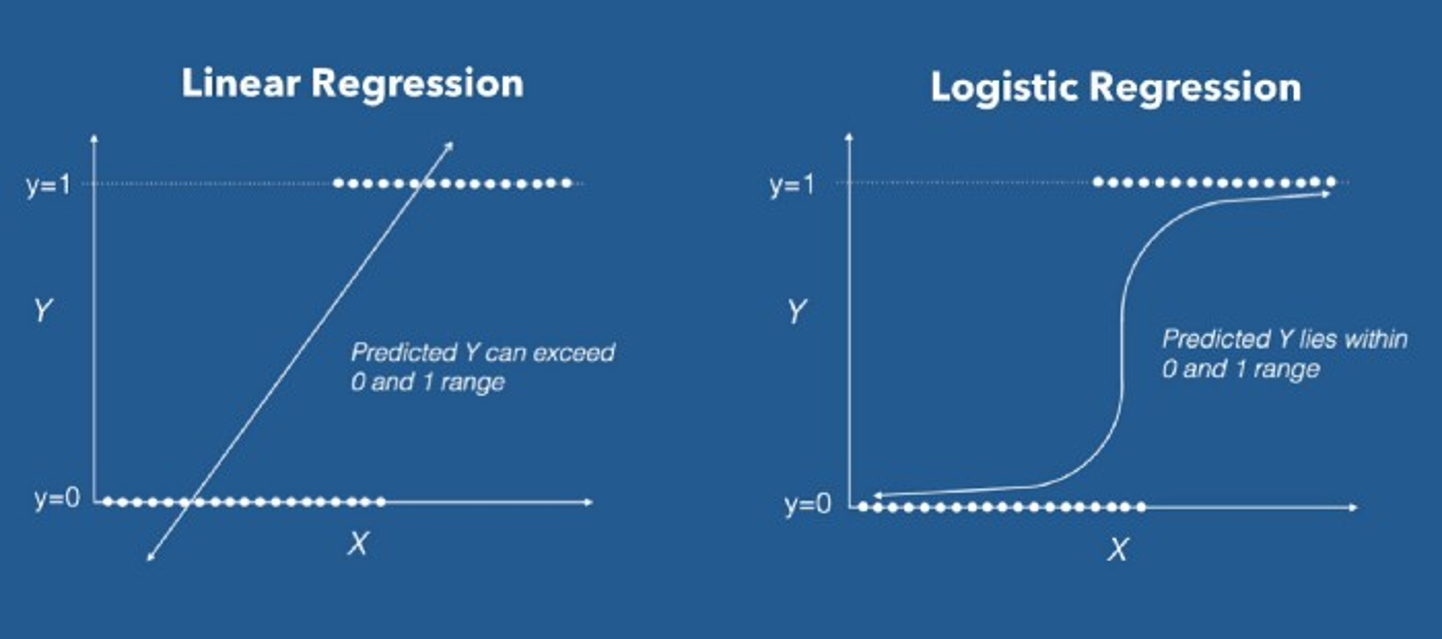

In [ ]:
# Load the algorithm
classification_model = linear_model.LogisticRegression()

In [ ]:
# Train the data
classification_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict the Y using trained model
y_train_pred = classification_model.predict(X_train)
y_test_pred = classification_model.predict(X_test)
target_array_pred = classification_model.predict(final_feature_array)

In [ ]:
# Check the classes, intercept(constant) & coeficient(independent factors) to make the equation
print(classification_model.classes_)
print(classification_model.intercept_)
print(classification_model.coef_)

['Female' 'Male']
[-22.82550815]
[[-0.32156977  0.72684569  1.04480415  3.9959099   3.62032219  3.4934777
   3.74542486]]


In [ ]:
# Check the probability of gender per rows
print(classification_model.predict_proba(X_test))

[[9.99850145e-01 1.49855349e-04]
 [1.25881240e-03 9.98741188e-01]
 [3.92296755e-02 9.60770324e-01]
 ...
 [9.99525052e-01 4.74948095e-04]
 [8.21676747e-04 9.99178323e-01]
 [9.99348014e-01 6.51985614e-04]]


In [ ]:
# Check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

Real Data
[['Female']
 ['Female']
 ['Male']
 ['Male']
 ['Male']]

 Predicted Data
['Female' 'Female' 'Male' 'Male' 'Male']


In [ ]:
# Check the data in the form of dataframe
final_with_pred_df = final_df.copy()
final_with_pred_df['gender_prediction'] = target_array_pred.reshape(-1,)
final_with_pred_df.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_prediction
0,1,11.8,6.1,1,0,1,1,Male,Male
1,0,14.0,5.4,0,0,1,0,Female,Female
2,0,11.8,6.3,1,1,1,1,Male,Male
3,0,14.4,6.1,0,1,1,1,Male,Male
4,1,13.5,5.9,0,0,0,0,Female,Female


In [ ]:
# Evaluate classification model - accuracy
accuracy_training = metrics.accuracy_score(y_train,y_train_pred)
accuracy_test = metrics.accuracy_score(y_test,y_test_pred)

print('Accuracy Training Data: {}'.format(accuracy_training))
print('Accuracy Test Data: {}'.format(accuracy_test))

Accuracy Training Data: 0.96925
Accuracy Test Data: 0.965034965034965


In [ ]:
# Create calculation of confusion matrix
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[1919   64]
 [  59 1958]]
[[502  16]
 [ 19 464]]


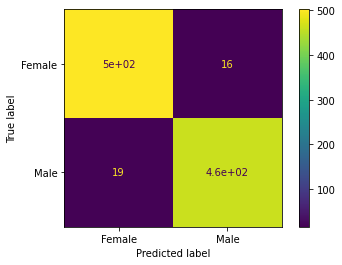

In [ ]:
# Create visualisation of confusion matrix from test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model, X_test, y_test)

From the matrix above, test data have predict as below:

**Wrong prediction**
1.   Predict male as female for 19 times from 483 data
2.   Predict female as male for 16 times from 518 data



### Naive Bayes

**Naive Bayes** is a term that is collectively used for **classification algorithms** that are based on **Bayes Theorem** from independent variables.

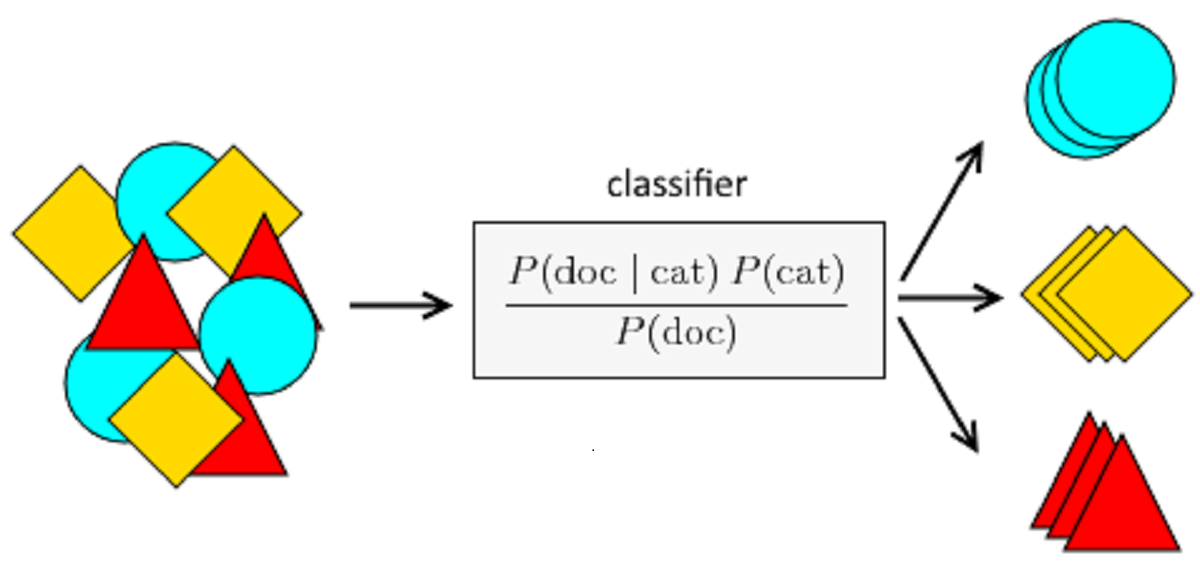

In [ ]:
# Load the algorithm
from sklearn.naive_bayes import GaussianNB
classification_model_NB = GaussianNB()

In [ ]:
# Train the data
classification_model_NB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict the Y using trained model
y_train_pred_NB = classification_model_NB.predict(X_train)
y_test_pred_NB = classification_model_NB.predict(X_test)
target_array_pred_NB = classification_model_NB.predict(final_feature_array)

In [ ]:
# Check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred_NB[:5])

Real Data
[['Female']
 ['Female']
 ['Male']
 ['Male']
 ['Male']]

 Predicted Data
['Female' 'Female' 'Male' 'Male' 'Male']


In [ ]:
# Check the data in the form of dataframe
final_with_pred_df_NB = final_df.copy()
final_with_pred_df_NB['gender_prediction'] = target_array_pred_NB.reshape(-1,)
final_with_pred_df_NB.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_prediction
0,1,11.8,6.1,1,0,1,1,Male,Male
1,0,14.0,5.4,0,0,1,0,Female,Female
2,0,11.8,6.3,1,1,1,1,Male,Male
3,0,14.4,6.1,0,1,1,1,Male,Male
4,1,13.5,5.9,0,0,0,0,Female,Female


In [ ]:
# Evaluate classification model - accuracy
accuracy_training_NB = metrics.accuracy_score(y_train,y_train_pred_NB)
accuracy_test_NB = metrics.accuracy_score(y_test,y_test_pred_NB)

print('Accuracy Training Data: {}'.format(accuracy_training_NB))
print('Accuracy Test Data: {}'.format(accuracy_test_NB))

Accuracy Training Data: 0.97275
Accuracy Test Data: 0.968031968031968


In [ ]:
# Create calculation of confusion matrix
print(confusion_matrix(y_train,y_train_pred_NB))
print(confusion_matrix(y_test,y_test_pred_NB))

[[1939   44]
 [  65 1952]]
[[504  14]
 [ 18 465]]


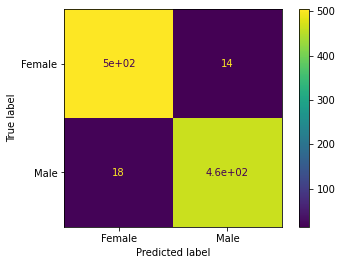

In [ ]:
# Create visualisation of confusion matrix from test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model_NB, X_test, y_test)

From the matrix above, test data have predict as below:

**Wrong prediction**
1.   Predict male as female for 18 times from 483 data
2.   Predict female as male for 14 times from 518 data



### Decision Tree

A machine learning algorithm that constructs **“rules”** that divide the data into several **“decisions”** after one another, so it looks like a **“tree”**.

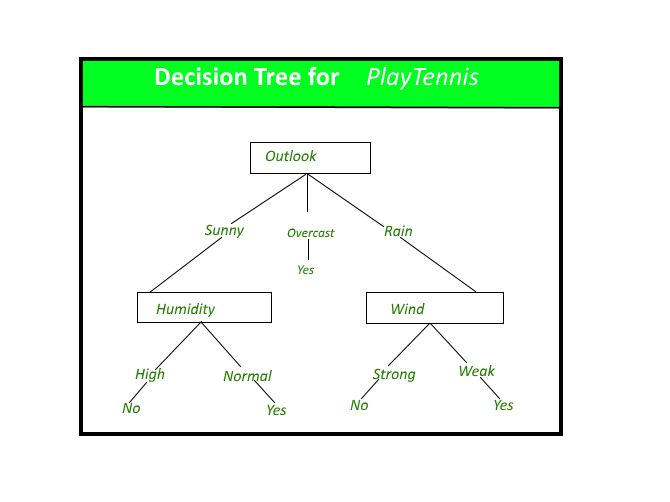

In [ ]:
# Load the algorithm
from sklearn.tree import DecisionTreeClassifier
classification_model_DT = DecisionTreeClassifier()

In [ ]:
# Train the data
classification_model_DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predict the Y using trained model
y_train_pred_DT = classification_model_DT.predict(X_train)
y_test_pred_DT = classification_model_DT.predict(X_test)
target_array_pred_DT = classification_model_DT.predict(final_feature_array)

In [ ]:
# Check the raw prediction data & compare with real data
print('Real Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred_DT[:5])

Real Data
[['Female']
 ['Female']
 ['Male']
 ['Male']
 ['Male']]

 Predicted Data
['Female' 'Female' 'Male' 'Male' 'Male']


In [ ]:
# Check the data in the form of dataframe
final_with_pred_df_DT = final_df.copy()
final_with_pred_df_DT['gender_prediction'] = target_array_pred_DT.reshape(-1,)
final_with_pred_df_DT.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_prediction
0,1,11.8,6.1,1,0,1,1,Male,Male
1,0,14.0,5.4,0,0,1,0,Female,Female
2,0,11.8,6.3,1,1,1,1,Male,Male
3,0,14.4,6.1,0,1,1,1,Male,Male
4,1,13.5,5.9,0,0,0,0,Female,Female


In [ ]:
# Evaluate classification model - accuracy
accuracy_training_DT = metrics.accuracy_score(y_train,y_train_pred_DT)
accuracy_test_DT = metrics.accuracy_score(y_test,y_test_pred_DT)

print('Accuracy Training Data: {}'.format(accuracy_training_DT))
print('Accuracy Test Data: {}'.format(accuracy_test_DT))

Accuracy Training Data: 0.99925
Accuracy Test Data: 0.9600399600399601


In [ ]:
# Create calculation of confusion matrix
print(confusion_matrix(y_train,y_train_pred_DT))
print(confusion_matrix(y_test,y_test_pred_DT))

[[1983    0]
 [   3 2014]]
[[502  16]
 [ 24 459]]


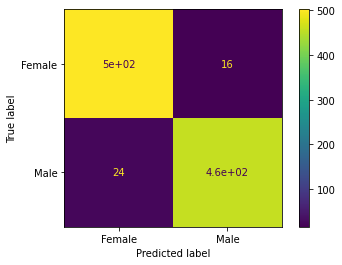

In [ ]:
# Create visualisation of confusion matrix from test data
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classification_model_DT, X_test, y_test)

From the matrix above, test data have predict as below:

**Wrong prediction**
1.   Predict male as female for 24 times from 483 data
2.   Predict female as male for 17 times from 518 data



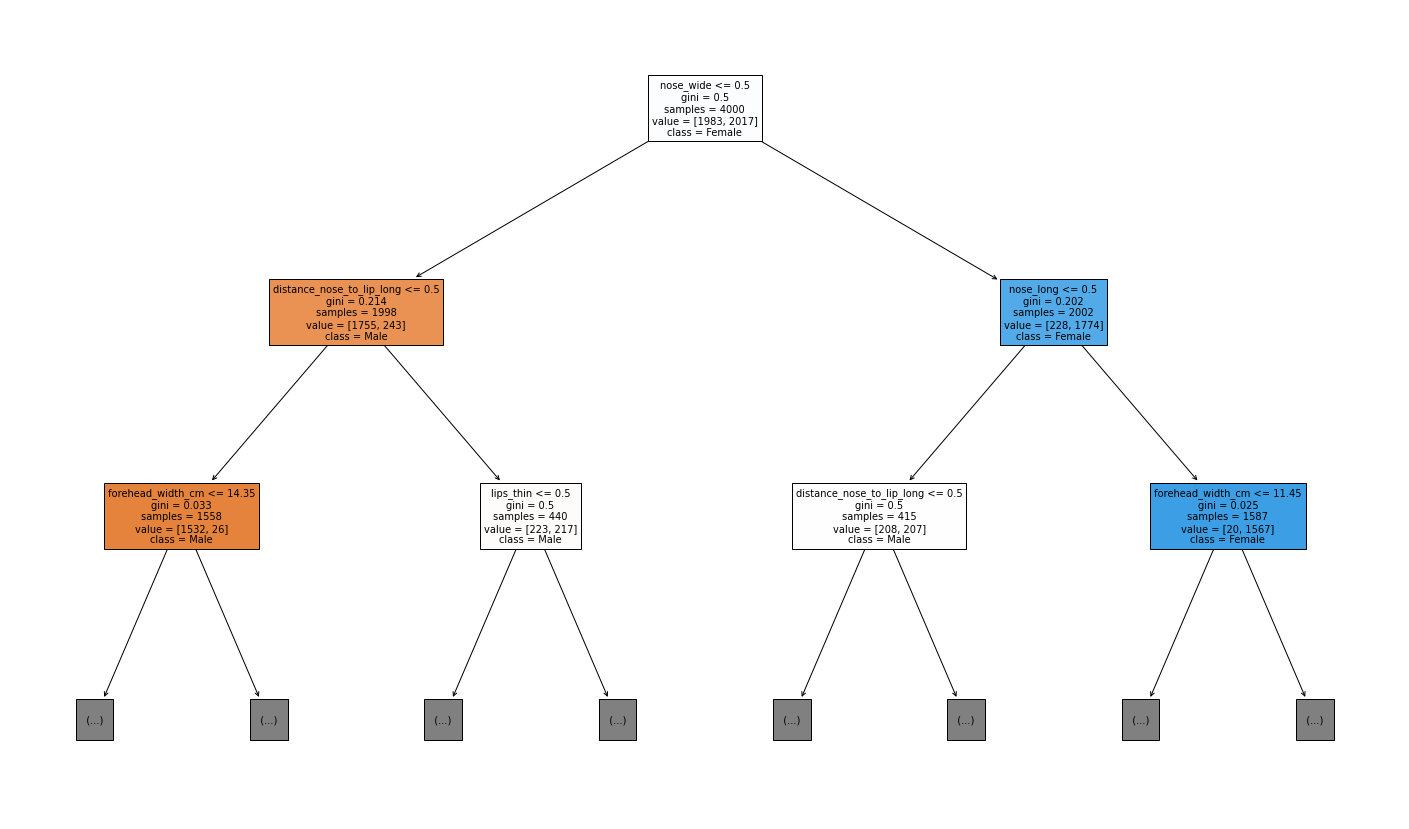

In [ ]:
# Create visualization of decision tree from data
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,15))
tree.plot_tree(classification_model_DT,ax=ax,feature_names=num_col,class_names=gen_data['gender'],filled=True,max_depth=2)
plt.show()

*Since it has so many 'decision', just print out the decision tree with max_depth of 2*